In [10]:
from skimage.io import imread
from skimage import img_as_float
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from matplotlib import pylab
import numpy as np
import math
%matplotlib inline

## 1. Загрузите картинку parrots.jpg. 

Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.

In [11]:
image = imread('C:\\Users\\kvanc\\coursera\\files\\parrots.jpg')

In [12]:
image = img_as_float(image)
image

array([[[0.01568627, 0.49411765, 0.01960784],
        [0.00784314, 0.49411765, 0.00784314],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.21960784, 0.00784314],
        [0.        , 0.20784314, 0.03137255],
        [0.00784314, 0.21568627, 0.04313725]],

       [[0.01568627, 0.49411765, 0.01960784],
        [0.00784314, 0.49411765, 0.00784314],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.21176471, 0.00392157],
        [0.        , 0.20784314, 0.03137255],
        [0.        , 0.20392157, 0.03137255]],

       [[0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.21176471, 0.00392157],
        [0.        , 0.20392157, 0.03137255],
        [0.        , 0.2       , 0.03137255]],

       ...,

       [[0.4745098 , 0.37647059, 0.01568627],
        [0.44705882, 0.35686275, 0.        ],
        [0.45098039, 0

## 2. Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.

In [13]:
r = image[:, :, 0].ravel()
g = image[:, :, 1].ravel()
b = image[:, :, 2].ravel()
rgb = np.transpose(np.vstack((r, g, b)))

## 3. Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. 

После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.

In [15]:
kmeans = KMeans(init = 'k-means++', random_state = 241).fit(rgb)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [16]:
labels_img = np.reshape(labels, (-1, 713))
new_img = np.copy(image)

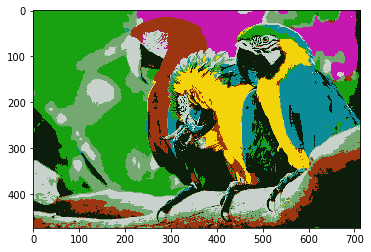

In [17]:
for cluster in range(kmeans.n_clusters):
    new_img[labels_img == cluster] = centers[cluster]
    pylab.imshow(new_img)

In [19]:
new_img_med = np.copy(image)

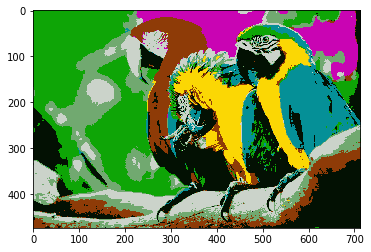

In [22]:
for cluster in range(kmeans.n_clusters):
    r_med = np.median(image[:, :, 0][labels_img == cluster])
    g_med = np.median(image[:, :, 1][labels_img == cluster])
    b_med = np.median(image[:, :, 2][labels_img == cluster])
    new_img_med[labels_img == cluster] = [r_med, g_med, b_med]
    pylab.imshow(new_img_med)

## 4. Измерьте качество получившейся сегментации с помощью метрики PSNR.

Эту метрику нужно реализовать самостоятельно.

In [23]:
def psnr(image_1, image_2):
    mse = np.mean((image_1 - image_2) ** 2)
    psnr = 20 * math.log10(np.max(image_1) / math.sqrt(mse))
    return psnr

In [24]:
psnr(image, new_img)

18.436819103300206

## 5. Найдите минимальное количество кластеров, при котором значение PSNR выше 20.

Можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера. Это число и будет ответом в данной задаче.

11 20.12758357097769


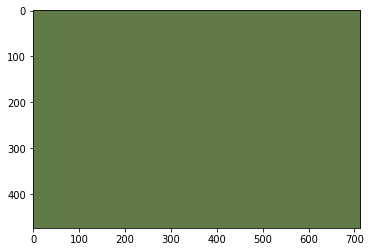

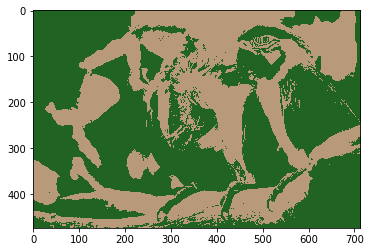

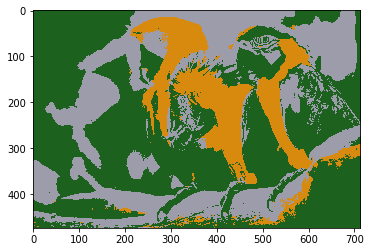

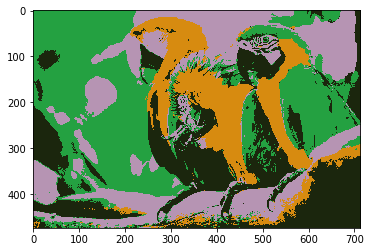

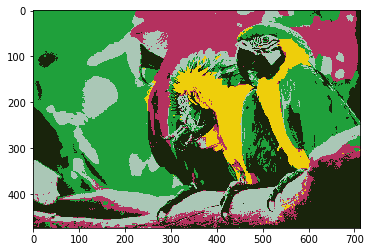

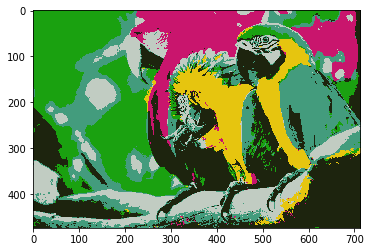

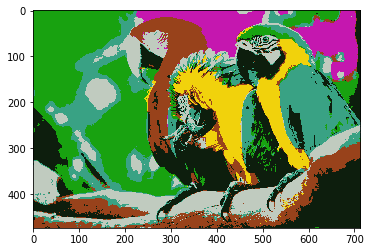

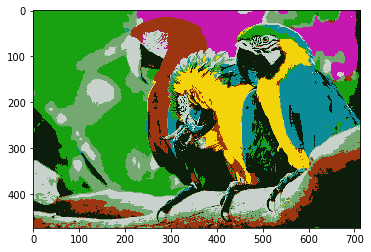

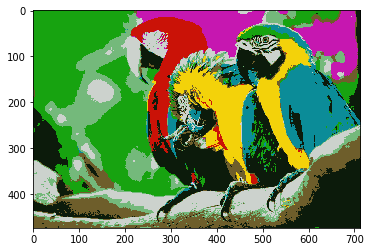

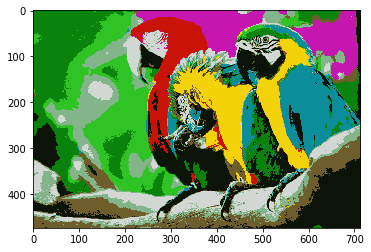

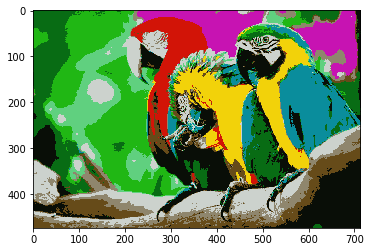

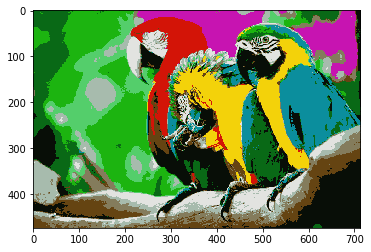

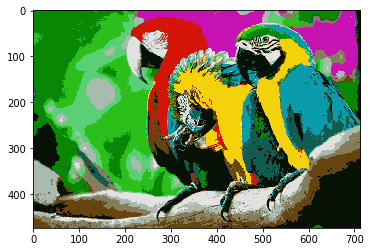

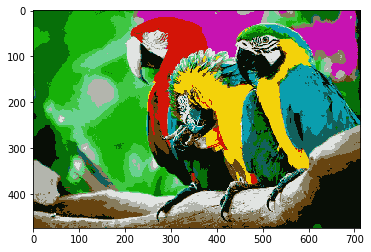

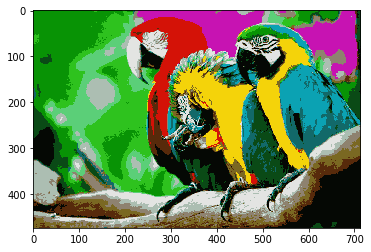

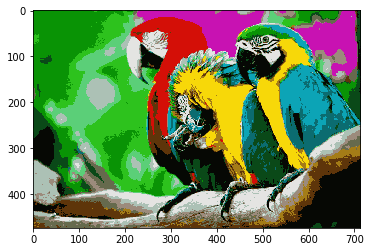

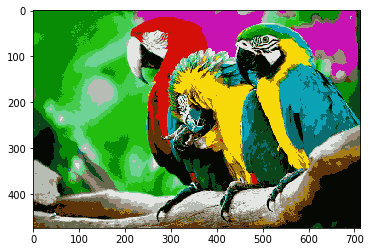

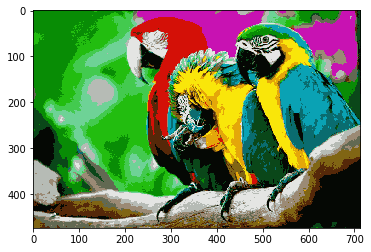

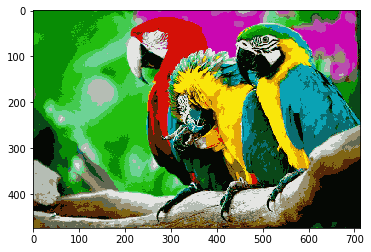

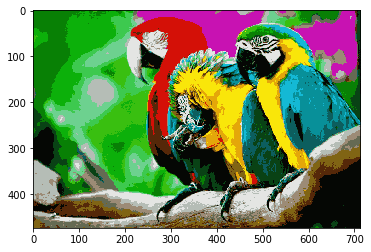

In [26]:
psnr_dict = {}
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 241).fit(rgb)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    labels_img = np.reshape(labels, (-1, 713))
    new_img = np.copy(image)
    for cluster in range(i):
        new_img[labels_img == cluster] = centers[cluster]
    psnr_dict[i] = psnr(image, new_img)
    pylab.figure()
    pylab.imshow(new_img)
for key, value in psnr_dict.items():
    if value > 20:
        print(key, value)
        break